In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy import stats
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv('data/diabetic_data.csv', index_col=0, parse_dates=True)
df.head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.drop(columns=['weight', 'payer_code'])

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),1,1,7,3,?,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,11,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),1,1,7,2,?,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),1,1,7,1,?,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,?,51,...,No,Down,No,No,No,No,No,Ch,Yes,>30
443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,?,33,...,No,Steady,No,No,No,No,No,No,Yes,NO
443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,?,53,...,No,Down,No,No,No,No,No,Ch,Yes,NO


In [31]:
df["gender"]

encounter_id
2278392      Female
149190       Female
64410        Female
500364         Male
16680          Male
              ...  
443847548      Male
443847782    Female
443854148      Male
443857166    Female
443867222      Male
Name: gender, Length: 101766, dtype: object

In [50]:
df['gender'], _ = pd.factorize(df['gender'], sort=True)
df['race'], _ = pd.factorize(df['race'], sort=True)
df["age"],_=pd.factorize(df['age'], sort=True)

In [5]:
from scipy.stats import chisquare
df=df.apply(lambda x : pd.factorize(x)[0])+1
pd.DataFrame([chisquare(df[x].values,f_exp=df.values.T,axis=1)[0] for x in df])

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0.000000e+00,1.429154e+14,1.263806e+14,2.456442e+13,1.618410e+14,6.994422e+13,6.637975e+13,1.045309e+14,6.260841e+13,7.589970e+13,...,1.649830e+14,1.039239e+14,1.641897e+14,1.649732e+14,1.649825e+14,1.649788e+14,1.649806e+14,1.237981e+14,1.001008e+14,1.272263e+14
1,3.549072e+09,0.000000e+00,8.468183e+04,4.824940e+05,1.071382e+05,1.173809e+05,1.946046e+05,1.280282e+05,3.231467e+05,1.854443e+05,...,1.030370e+05,1.099094e+05,1.025950e+05,1.030435e+05,1.030375e+05,1.030300e+05,1.030375e+05,8.233500e+04,7.056000e+04,9.458783e+04
2,3.549060e+09,5.527325e+04,0.000000e+00,4.616042e+05,4.954589e+04,8.273350e+04,1.634419e+05,9.207439e+04,2.944356e+05,1.437591e+05,...,4.706700e+04,7.225025e+04,4.692200e+04,4.705850e+04,4.706750e+04,4.706500e+04,4.706750e+04,3.739500e+04,3.137950e+04,4.553167e+04
3,3.547914e+09,3.405903e+06,2.878429e+06,0.000000e+00,3.938455e+06,1.161047e+06,9.914753e+05,1.983384e+06,9.637806e+05,2.171867e+06,...,4.041215e+06,2.335218e+06,4.023510e+06,4.040860e+06,4.041192e+06,4.041153e+06,4.041192e+06,2.867265e+06,2.058023e+06,2.741882e+06
4,3.549139e+09,5.018660e+04,3.908750e+04,5.255486e+05,0.000000e+00,1.207435e+05,2.022685e+05,1.104557e+05,3.332320e+05,1.577365e+05,...,2.602300e+04,9.241000e+04,2.639500e+04,2.602950e+04,2.602350e+04,2.602400e+04,2.602350e+04,4.222050e+04,5.080850e+04,4.652350e+04
5,3.548807e+09,3.611866e+05,2.727205e+05,3.041860e+05,4.230942e+05,0.000000e+00,1.549279e+05,2.803532e+05,2.875862e+05,2.637461e+05,...,4.300650e+05,2.269113e+05,4.273922e+05,4.300340e+05,4.300640e+05,4.300570e+05,4.300580e+05,2.629905e+05,1.645315e+05,2.774555e+05
6,3.548631e+09,1.569276e+06,1.362680e+06,3.505623e+05,1.858316e+06,5.891192e+05,0.000000e+00,1.036669e+06,5.200745e+05,1.259857e+06,...,1.875420e+06,1.180656e+06,1.866269e+06,1.875338e+06,1.875419e+06,1.875412e+06,1.875416e+06,1.343412e+06,1.011832e+06,1.300309e+06
7,3.548869e+09,5.452200e+05,4.396140e+05,3.850101e+05,6.028140e+05,3.038887e+05,2.861674e+05,0.000000e+00,3.859323e+05,5.459300e+05,...,6.281320e+05,3.907393e+05,6.274886e+05,6.281235e+05,6.281310e+05,6.281315e+05,6.281325e+05,4.469830e+05,3.146095e+05,4.440682e+05
8,3.548355e+09,2.442017e+06,2.139924e+06,2.809506e+05,2.869697e+06,9.540960e+05,7.563243e+05,1.513286e+06,0.000000e+00,1.741399e+06,...,2.952335e+06,1.609949e+06,2.939985e+06,2.952082e+06,2.952332e+06,2.952272e+06,2.952276e+06,2.003536e+06,1.501630e+06,1.985164e+06
9,3.548769e+09,9.675872e+05,8.241805e+05,4.130981e+05,1.169337e+06,3.673440e+05,4.899773e+05,7.091914e+05,5.749877e+05,0.000000e+00,...,1.201921e+06,6.417864e+05,1.190426e+06,1.201723e+06,1.201898e+06,1.201874e+06,1.201890e+06,7.851580e+05,5.963325e+05,8.651885e+05


In [46]:
pd.DataFrame([chisquare(df["race"],df["gender"])])

,statistic,pvalue
0,84681.833333,1.0


In [52]:
cov(df["race"],df["age"])

array([[ 0.84999926, -0.18303951],
       [-0.18303951,  2.54110306]])

In [58]:
df['race'].corr(df['gender'])

-0.019468157213879993

In [7]:
import seaborn as sns
corr = df.corr(method="pearson")
sns.heatmap(corr)

In [6]:
corr = df.corr(method="pearson")

In [16]:
df1["diag_1"]

encounter_id
2278392      250.83
149190          276
64410           648
500364            8
16680           197
              ...  
443847548    250.13
443847782       560
443854148        38
443857166       996
443867222       530
Name: diag_1, Length: 101766, dtype: object

In [4]:
missing_values = ["n/a", "na", "--","?"]
df1= pd.read_csv("diabetic_data.csv",index_col=0, parse_dates=True,na_values = missing_values)
df1
df1["readmitted"].replace({">30": "NO"}, inplace=True)
#df1["diag_1"]=df1["diag_1"].str.replace("250","YES")
m = df1['diag_1'].str.contains('250', na=False)
df1.loc[m,'diag_1'] = "YES"
m = df1['diag_1'].str.contains('1', na=False)
df1.loc[m,'diag_1'] = "NO"
m = df1['diag_1'].str.contains('2', na=False)
df1.loc[m,'diag_1'] = "NO"
m = df1['diag_1'].str.contains('3', na=False)
df1.loc[m,'diag_1'] = "NO"
m = df1['diag_1'].str.contains('4', na=False)
df1.loc[m,'diag_1'] = "NO"
m = df1['diag_1'].str.contains('5', na=False)
df1.loc[m,'diag_1'] = "NO"
m = df1['diag_1'].str.contains('6', na=False)
df1.loc[m,'diag_1'] = "NO"
m = df1['diag_1'].str.contains('7', na=False)
df1.loc[m,'diag_1'] = "NO"
m = df1['diag_1'].str.contains('8', na=False)
df1.loc[m,'diag_1'] = "NO"
m = df1['diag_1'].str.contains('9', na=False)
df1.loc[m,'diag_1'] = "NO"
m = df1['diag_1'].str.contains('0', na=False)
df1.loc[m,'diag_1'] = "NO"
df1["diag_1"]

D:\anacod\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


encounter_id
2278392      YES
149190        NO
64410         NO
500364        NO
16680         NO
            ... 
443847548    YES
443847782     NO
443854148     NO
443857166     NO
443867222     NO
Name: diag_1, Length: 101766, dtype: object

In [5]:
m = df1['diag_2'].str.contains('250', na=False)
df1.loc[m,'diag_2'] = "YES"

m = df1['diag_2'].str.contains('1', na=False)
df1.loc[m,'diag_2'] = "NO"
m = df1['diag_2'].str.contains('2', na=False)
df1.loc[m,'diag_2'] = "NO"
m = df1['diag_2'].str.contains('3', na=False)
df1.loc[m,'diag_2'] = "NO"
m = df1['diag_2'].str.contains('4', na=False)
df1.loc[m,'diag_2'] = "NO"
m = df1['diag_2'].str.contains('5', na=False)
df1.loc[m,'diag_2'] = "NO"
m = df1['diag_2'].str.contains('6', na=False)
df1.loc[m,'diag_2'] = "NO"
m = df1['diag_2'].str.contains('7', na=False)
df1.loc[m,'diag_2'] = "NO"
m = df1['diag_2'].str.contains('8', na=False)
df1.loc[m,'diag_2'] = "NO"
m = df1['diag_2'].str.contains('9', na=False)
df1.loc[m,'diag_2'] = "NO"
m = df1['diag_2'].str.contains('0', na=False)
df1.loc[m,'diag_2'] = "NO"
df1["diag_2"]

encounter_id
2278392      NaN
149190       YES
64410        YES
500364       YES
16680         NO
            ... 
443847548     NO
443847782     NO
443854148     NO
443857166     NO
443867222     NO
Name: diag_2, Length: 101766, dtype: object

In [6]:
m = df1['diag_3'].str.contains('250', na=False)
df1.loc[m,'diag_3'] = "YES"

m = df1['diag_3'].str.contains('1', na=False)
df1.loc[m,'diag_3'] = "NO"
m = df1['diag_3'].str.contains('2', na=False)
df1.loc[m,'diag_3'] = "NO"
m = df1['diag_3'].str.contains('3', na=False)
df1.loc[m,'diag_3'] = "NO"
m = df1['diag_3'].str.contains('4', na=False)
df1.loc[m,'diag_3'] = "NO"
m = df1['diag_3'].str.contains('5', na=False)
df1.loc[m,'diag_3'] = "NO"
m = df1['diag_3'].str.contains('6', na=False)
df1.loc[m,'diag_3'] = "NO"
m = df1['diag_3'].str.contains('7', na=False)
df1.loc[m,'diag_3'] = "NO"
m = df1['diag_3'].str.contains('8', na=False)
df1.loc[m,'diag_3'] = "NO"
m = df1['diag_3'].str.contains('9', na=False)
df1.loc[m,'diag_3'] = "NO"
m = df1['diag_3'].str.contains('0', na=False)
df1.loc[m,'diag_3'] = "NO"
df1["diag_3"]

encounter_id
2278392      NaN
149190        NO
64410         NO
500364        NO
16680        YES
            ... 
443847548     NO
443847782     NO
443854148     NO
443857166     NO
443867222     NO
Name: diag_3, Length: 101766, dtype: object

In [7]:
df2=df1.drop(columns=['weight', 'payer_code',"medical_specialty"])

In [8]:
df2=df2.dropna()
df2

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,...,No,Steady,No,No,No,No,No,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,...,No,Down,No,No,No,No,No,Ch,Yes,NO
443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,...,No,Steady,No,No,No,No,No,No,Yes,NO
443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,0,...,No,Down,No,No,No,No,No,Ch,Yes,NO


In [9]:

#df2["age"],_=pd.factorize(df2['age'], sort=True), 0:(0-10),1:(10-20),2:(20-30),3:(30-40),4:(40-50),5:(50-60),6:(60-70),
#                                                   7:(70-80),8:(80-90)

###0:<30    1:>30   2:No
#df2["readmitted"],_=pd.factorize(df2['readmitted'],sort=True)
df2[["race","gender","age","admission_type_id","discharge_disposition_id","admission_source_id",
    "max_glu_serum","A1Cresult","metformin","repaglinide","nateglinide","chlorpropamide","glimepiride","acetohexamide",
     "glipizide","glyburide","tolbutamide","pioglitazone","rosiglitazone","acarbose","miglitol","troglitazone","tolazamide",
     "examide","citoglipton","insulin","glyburide","metformin","glipizide","metformin","glimepiride","pioglitazone","metformin",
     "rosiglitazone","metformin","pioglitazone","change","diabetesMed","readmitted"
    ]].apply(lambda x: x.astype('category'))
df2

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,...,No,Steady,No,No,No,No,No,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,...,No,Down,No,No,No,No,No,Ch,Yes,NO
443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,...,No,Steady,No,No,No,No,No,No,Yes,NO
443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,0,...,No,Down,No,No,No,No,No,Ch,Yes,NO


In [10]:
df2.dtypes

patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide         

In [52]:
df2['admission_type_id'] = df2.admission_type_id.astype('object')
df2['discharge_disposition_id'] = df2.discharge_disposition_id.astype('object')
df2['admission_source_id'] = df2.admission_source_id.astype('object')
df2.dtypes

patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide         

In [11]:
import seaborn as sns
corr = df2.corr(method="pearson")
print(corr)
sns.heatmap(corr)

                          patient_nbr  admission_type_id  \
patient_nbr                  1.000000          -0.013327   
admission_type_id           -0.013327           1.000000   
discharge_disposition_id    -0.143046           0.079878   
admission_source_id         -0.035921           0.109265   
time_in_hospital            -0.029932          -0.012209   
num_lab_procedures           0.013413          -0.141212   
num_procedures              -0.022269           0.129468   
num_medications              0.010350           0.080273   
number_outpatient            0.101727           0.026126   
number_emergency             0.060407          -0.019799   
number_inpatient             0.009585          -0.037119   
number_diagnoses             0.214283          -0.122603   

                          discharge_disposition_id  admission_source_id  \
patient_nbr                              -0.143046            -0.035921   
admission_type_id                         0.079878             0.1092

In [65]:
df2["readmitted"]

encounter_id
149190       NO
64410        NO
500364       NO
16680        NO
35754        NO
             ..
443847548    NO
443847782    NO
443854148    NO
443857166    NO
443867222    NO
Name: readmitted, Length: 98053, dtype: object

In [67]:
df2.iloc[12]

patient_nbr                  77586282
race                        Caucasian
gender                           Male
age                           [80-90)
admission_type_id                   1
discharge_disposition_id            6
admission_source_id                 7
time_in_hospital                   10
num_lab_procedures                 55
num_procedures                      1
num_medications                    31
number_outpatient                   0
number_emergency                    0
number_inpatient                    0
diag_1                             NO
diag_2                             NO
diag_3                             NO
number_diagnoses                    8
max_glu_serum                    None
A1Cresult                        None
metformin                          No
repaglinide                        No
nateglinide                        No
chlorpropamide                     No
glimepiride                        No
acetohexamide                      No
glipizide   

In [68]:
df2.iloc[37]

patient_nbr                  99715041
race                        Caucasian
gender                           Male
age                           [40-50)
admission_type_id                   2
discharge_disposition_id            1
admission_source_id                 2
time_in_hospital                    7
num_lab_procedures                 36
num_procedures                      2
num_medications                     9
number_outpatient                   0
number_emergency                    0
number_inpatient                    0
diag_1                             NO
diag_2                             NO
diag_3                             NO
number_diagnoses                    5
max_glu_serum                    None
A1Cresult                        None
metformin                          No
repaglinide                        No
nateglinide                        No
chlorpropamide                     No
glimepiride                        No
acetohexamide                      No
glipizide   

In [219]:
#formula = 'readmitted ~ age'                     '
#model = smf.glm(formula = formula, data=df3)
#result = model.fit()
#print(result.summary()) 

In [15]:
from sklearn.linear_model import LinearRegression

In [229]:
#### diag_1 v45??? should not be categroical
m = sm.OLS.from_formula('readmitted~age+race+gender+age+admission_type_id+discharge_disposition_id+admission_source_id+time_in_hospital+num_lab_procedures+num_procedures+num_medications+number_outpatient+number_emergency+number_inpatient+diag_1+diag_2+diag_3+max_glu_serum+A1Cresult+metformin+repaglinide+nateglinide+chlorpropamide+glimepiride+acetohexamide+glipizide+glyburide+tolbutamide+pioglitazone+rosiglitazone+acarbose+miglitol+troglitazone+tolazamide+examide+citoglipton+insulin+glyburide+metformin+glipizide+metformin+glimepiride+pioglitazone+metformin+rosiglitazone+metformin+pioglitazone+change+diabetesMed', df2)
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             readmitted   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     5.000
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:08:16   Log-Likelihood:                -96489.
No. Observations:               98053   AIC:                         1.976e+05
Df Residuals:                   95748   BIC:                         2.195e+05
Df Model:                        2304                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.1037      1.057      1.044      0.296      -0.968       3.175
age[T.[10-20)]               -0.1642      0.092     -1.778      0.075      -0.345       0.017
age[T.[20-30)]               -0.2101      0.089     -2.361      0.018      -0.385      -0.036
age[T.[30-40)]               -0.2289      0.088     -2.595      0.009      -0.402      -0.056
age[T.[40-50)]               -0.2313      0.088     -2.630      0.009      -0.404      -0.059
age[T.[50-60)]               -0.2284      0.088     -2.598      0.009      -0.401      -0.056
age[T.[60-70)]               -0.2572      0.088     -2.926      0.003      -0.430      -0.085
age[T.[70-80)]               -0.2766      0.088     -3.147      0.002      -0.449      -0.104
age[T.[80-90)]               -0.2719      0.088     -3.091      0.002      -0.444      -0.099
age[T.[90-100)]              -0.1863      0.089     -2.098      0.036      -0.360      -0.012
race[T.Asian]                 0.0524      0.027      1.932      0.053      -0.001       0.106
race[T.Caucasian]            -0.0220      0.006     -3.827      0.000      -0.033      -0.011
race[T.Hispanic]              0.0143      0.016      0.904      0.366      -0.017       0.045
race[T.Other]                 0.0426      0.018      2.364      0.018       0.007       0.078
gender[T.Male]                0.0205      0.004      4.560      0.000       0.012       0.029
gender[T.Unknown/Invalid]     0.4563      0.656      0.696      0.486      -0.829       1.741
diag_1[T.11]                  0.1226      0.208      0.590      0.555      -0.285       0.530
diag_1[T.110]                 0.3103      0.467      0.664      0.507      -0.605       1.226
diag_1[T.112]                -0.1258      0.079     -1.584      0.113      -0.281       0.030
diag_1[T.114]                -0.4069      0.655     -0.622      0.534      -1.690       0.876
diag_1[T.115]                 0.4088      0.467      0.875      0.382      -0.507       1.325
diag_1[T.117]                 0.1135      0.258      0.439      0.660      -0.393       0.620
diag_1[T.131]                -0.5050      0.465     -1.085      0.278      -1.417       0.407
diag_1[T.133]                 0.4745      0.659      0.720      0.471      -0.817       1.766
diag_1[T.135]                -0.0803      0.147     -0.548      0.584      -0.368       0.207
diag_1[T.136]                 0.3265      0.297      1.101      0.271      -0.255       0.908
diag_1[T.141]                -0.1607      0.268     -0.599      0.549      -0.687       0.365
diag_1[T.142]                -0.1203      0.356     -0.338      0.735      -0.817       0.577
diag_1[T.143]                 0.4281      0.655      0.653      0.514      -0.857       1.713
diag_1[T.145]                -0.4435      0.656     -0.676      0.499      

In [183]:
df3[df3.columns[23:44]]
df3[["max_glu_serum","A1Cresult","metformin","repaglinide"]].apply(lambda x: x.astype('category'))
df3[df3.columns[20:44]]


,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change
encounter_id,,,,,,,,,,,,,,,,,,,,,
149190,No,No,No,No,No,No,No,No,No,No,...,No,No,No,Up,No,No,No,No,No,Ch
64410,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,No,No,No,No,No,No
500364,No,No,No,No,No,No,No,No,No,No,...,No,No,No,Up,No,No,No,No,No,Ch
16680,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,Steady,No,No,No,No,No,Ch
35754,No,No,No,No,No,No,No,No,No,No,...,No,No,No,Steady,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443847548,Steady,No,No,No,No,No,No,No,No,No,...,No,No,No,Down,No,No,No,No,No,Ch
443847782,No,No,No,No,No,No,No,No,No,No,...,No,No,No,Steady,No,No,No,No,No,No
443854148,Steady,No,No,No,No,No,No,No,No,No,...,No,No,No,Down,No,No,No,No,No,Ch


In [16]:
from glm.glm import GLM
from glm.families import Gaussian, Bernoulli, Poisson, Exponential
bin_model = GLM(family=Binomial())

NameError: name 'Binomial' is not defined

In [17]:
mod=smf.glm(formula='readmitted~age+race+gender+age+admission_type_id+discharge_disposition_id+admission_source_id+time_in_hospital+num_lab_procedures+num_procedures+num_medications+number_outpatient+number_emergency+number_inpatient+diag_1+diag_2+diag_3+max_glu_serum+A1Cresult+metformin+repaglinide+nateglinide+chlorpropamide+glimepiride+acetohexamide+glipizide+glyburide+tolbutamide+pioglitazone+rosiglitazone+acarbose+miglitol+troglitazone+tolazamide+examide+citoglipton+insulin+glyburide+metformin+glipizide+metformin+glimepiride+pioglitazone+metformin+rosiglitazone+metformin+pioglitazone+change+diabetesMed',
           data=df2,family=sm.families.Binomial()).fit()

In [72]:
print(mod.summary())

                           Generalized Linear Model Regression Results                           
Dep. Variable:     ['readmitted[<30]', 'readmitted[NO]']   No. Observations:                98053
Model:                                               GLM   Df Residuals:                    97930
Model Family:                                   Binomial   Df Model:                          122
Link Function:                                     logit   Scale:                          1.0000
Method:                                             IRLS   Log-Likelihood:                -32658.
Date:                                   Tue, 16 Nov 2021   Deviance:                       65315.
Time:                                           18:05:17   Pearson chi2:                 9.49e+04
No. Iterations:                                       26                                         
Covariance Type:                               nonrobust                                         
                    

In [109]:
mod1 = smf.glm(formula="readmitted~age+race+gender+age+admission_type_id+discharge_disposition_id+admission_source_id+time_in_hospital+num_lab_procedures+num_procedures+num_medications+number_outpatient+number_emergency+number_inpatient+max_glu_serum+A1Cresult+metformin+repaglinide+nateglinide+chlorpropamide+glimepiride+acetohexamide+glipizide+glyburide+tolbutamide+pioglitazone+rosiglitazone+acarbose+miglitol+troglitazone+tolazamide+examide+citoglipton+insulin+glyburide+metformin+glipizide+metformin+glimepiride+pioglitazone+metformin+rosiglitazone+metformin+pioglitazone+change+diabetesMed",
               data=df2, family=sm.families.Binomial()).fit()
print(mod1.summary())

                           Generalized Linear Model Regression Results                           
Dep. Variable:     ['readmitted[<30]', 'readmitted[NO]']   No. Observations:                98053
Model:                                               GLM   Df Residuals:                    97933
Model Family:                                   Binomial   Df Model:                          119
Link Function:                                     logit   Scale:                          1.0000
Method:                                             IRLS   Log-Likelihood:                -32663.
Date:                                   Sun, 07 Nov 2021   Deviance:                       65326.
Time:                                           15:54:11   Pearson chi2:                 9.49e+04
No. Iterations:                                       26                                         
Covariance Type:                               nonrobust                                         
                    

In [18]:
mod2 = smf.glm(formula="readmitted~age+diag_1+diag_2+diag_3+diabetesMed+time_in_hospital+num_medications+number_emergency+number_inpatient",
               data=df2, family=sm.families.Binomial()).fit()
print(mod2.summary())

                           Generalized Linear Model Regression Results                           
Dep. Variable:     ['readmitted[<30]', 'readmitted[NO]']   No. Observations:                98053
Model:                                               GLM   Df Residuals:                    98035
Model Family:                                   Binomial   Df Model:                           17
Link Function:                                     logit   Scale:                          1.0000
Method:                                             IRLS   Log-Likelihood:                -33422.
Date:                                   Sat, 20 Nov 2021   Deviance:                       66845.
Time:                                           16:51:03   Pearson chi2:                 9.69e+04
No. Iterations:                                        7                                         
Covariance Type:                               nonrobust                                         
                    

In [21]:
print(mod2.aic)
print(mod2.bic)

66880.61171083327
-1059897.4684326374


In [26]:
#########################################################################3
mod3 = smf.glm(formula="readmitted~age+race+admission_type_id+discharge_disposition_id+diag_1+diag_2+diag_3+diabetesMed+time_in_hospital+num_medications+number_emergency+number_inpatient",
               data=df2, family=sm.families.Binomial()).fit()
print(mod3.summary())

                           Generalized Linear Model Regression Results                           
Dep. Variable:     ['readmitted[<30]', 'readmitted[NO]']   No. Observations:                98053
Model:                                               GLM   Df Residuals:                    97999
Model Family:                                   Binomial   Df Model:                           53
Link Function:                                     logit   Scale:                          1.0000
Method:                                             IRLS   Log-Likelihood:                -32748.
Date:                                   Sat, 20 Nov 2021   Deviance:                       65497.
Time:                                           17:03:51   Pearson chi2:                 9.49e+04
No. Iterations:                                       26                                         
Covariance Type:                               nonrobust                                         
                    

In [27]:
print(mod3.aic)
print(mod3.bic)

65604.93340310537
-1060831.3892569647


In [28]:
mod4 = smf.glm(formula="readmitted~age+race+admission_type_id+discharge_disposition_id+diag_1+diag_2+diag_3+diabetesMed+time_in_hospital",
               data=df2, family=sm.families.Binomial()).fit()
print(mod4.summary())

                           Generalized Linear Model Regression Results                           
Dep. Variable:     ['readmitted[<30]', 'readmitted[NO]']   No. Observations:                98053
Model:                                               GLM   Df Residuals:                    98002
Model Family:                                   Binomial   Df Model:                           50
Link Function:                                     logit   Scale:                          1.0000
Method:                                             IRLS   Log-Likelihood:                -33694.
Date:                                   Sat, 20 Nov 2021   Deviance:                       67388.
Time:                                           17:04:11   Pearson chi2:                 9.63e+04
No. Iterations:                                       26                                         
Covariance Type:                               nonrobust                                         
                    

In [29]:
print(mod4.aic)
print(mod4.bic)

67489.9653274042
-1058974.8371229493


In [36]:
mod5 = smf.glm(formula="readmitted~age+race+admission_type_id+discharge_disposition_id+diag_1+diag_2+diag_3+time_in_hospital+age*diag_1+age*diag_2+age*diag_3",
               data=df2, family=sm.families.Binomial()).fit()
print(mod5.aic)
print(mod5.bic)

67529.34973535959
-1058688.6278658714


In [30]:
yhat=mod3.mu
yhat

array([0.05392547, 0.10638293, 0.08441309, ..., 0.08031692, 0.16058475,
       0.0710127 ])

In [75]:

y=df2["readmitted"]
y


encounter_id
149190       NO
64410        NO
500364       NO
16680        NO
35754        NO
             ..
443847548    NO
443847782    NO
443854148    NO
443857166    NO
443867222    NO
Name: readmitted, Length: 98053, dtype: object

Text(0.5, 0, 'Fitted values')

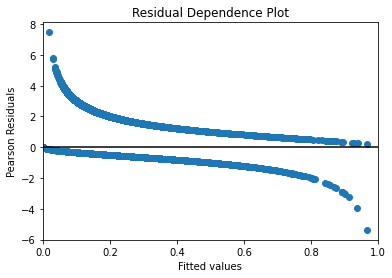

In [31]:
from statsmodels.graphics.api import abline_plot
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

ax.scatter(yhat, mod3.resid_pearson)
ax.hlines(0, 0, 1)
ax.set_xlim(0, 1)
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')

In [ ]:
def forward_regression(X, y,
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add   with p-value '.format(best_feature, best_pval))

        if not changed:
            break

    return included

forward_regression(X_train, Y_train)

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
X = array[:,1:-1]
Y=array[:,-1]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

D:\anacod\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: 'Caucasian'

In [86]:
import matplotlib.pyplot as plt
from sklearn_genetic import GAFeatureSelectionCV
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np
array = df2.values
X = array[:,1:-1]
Y=array[:,-1]
X = X.astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)
clf = SVC(gamma='auto')

evolved_estimator = GAFeatureSelectionCV(
    estimator=clf,
    scoring="accuracy",
    population_size=30,
    generations=20,
    n_jobs=-1)

# Train and select the features
evolved_estimator.fit(X_train, y_train)

# Features selected by the algorithm
features = evolved_estimator.best_features_
print(features)

# Predict only with the subset of selected features
y_predict_ga = evolved_estimator.predict(X_test[:, features])
print(accuracy_score(y_test, y_predict_ga))

ModuleNotFoundError: No module named 'sklearn_genetic'

In [79]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
 
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv('diabetic_data.csv', header=None)
    # retrieve numpy array
    dataset = df2.values
    #split into input (X) and output (y) variables
    X = dataset[:,1:-1]
    y = dataset[:,-1]
    # format all fields as string
    X = X.astype(str)
    return X, y
 
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset('breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

D:\anacod\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (0,1,6,7,8,9,12,13,14,15,16,17,21) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


ValueError: Found unknown categories ['Unknown/Invalid'] in column 1 during transform

In [78]:
Y

array(['NO', 'NO', 'NO', ..., 'NO', 'NO', 'NO'], dtype=object)

In [14]:
#############################random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
dataset = df2.values
X = dataset[:,1:-1]
y = dataset[:,-1]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)


In [18]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42,n_estimators=500)
random_forest.fit(X_train, y_train)
Yrandforest = random_forest.predict(X_test)

ValueError: could not convert string to float: 'Caucasian'

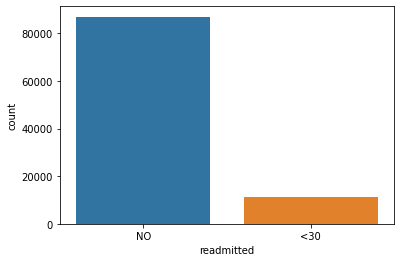

In [53]:
from sklearn.preprocessing import StandardScaler

dataset = df2

y=dataset.readmitted
y
x = pd.get_dummies(dataset.drop(columns=['readmitted', 'patient_nbr']))
x
sns.countplot(y)


In [54]:
floats= list(x.select_dtypes("int64").columns)
floats

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [59]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
x_scaled = x.copy()
x_scaled[floats] = scaler.fit_transform(x_scaled[floats])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)
print(x_train)
print(y_train)

              time_in_hospital  num_lab_procedures  num_procedures  \
encounter_id                                                         
435569288                    2                  35               0   
74754744                     4                  44               0   
103465524                    2                  20               3   
30797142                     2                  43               3   
29146830                    13                  65               1   
...                        ...                 ...             ...   
279003846                    4                  70               0   
368997356                    4                  52               0   
399016946                    1                  58               2   
129095784                    3                  33               0   
63659112                     1                   1               3   

              num_medications  number_outpatient  number_emergency  \
encounter_id       

In [68]:
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()
x_train_scaled[floats] = scaler.fit_transform(x_train[floats])
x_test_scaled[floats] = scaler.transform(x_test[floats])
x.head()


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_AfricanAmerican,race_Asian,...,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
encounter_id,,,,,,,,,,,,,,,,,,,,,
149190,3,59,0,18,0,0,0,9,0,0,...,0,1,0,1,1,0,1,0,0,1
64410,2,11,5,13,2,0,1,6,1,0,...,0,1,0,1,1,0,0,1,0,1
500364,2,44,1,16,0,0,0,7,0,0,...,0,1,0,1,1,0,1,0,0,1
16680,1,51,0,8,0,0,0,5,0,0,...,0,1,0,1,1,0,1,0,0,1
35754,3,31,6,16,0,0,0,9,0,0,...,0,1,0,1,1,0,0,1,0,1


In [87]:
from sklearn import metrics
randomforest = RandomForestClassifier(class_weight='balanced')
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

D:\anacod\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

         <30       0.29      0.04      0.08      2767
          NO       0.89      0.99      0.94     21747

    accuracy                           0.88     24514
   macro avg       0.59      0.52      0.51     24514
weighted avg       0.82      0.88      0.84     24514



In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))


[[  102  2665]
 [  273 21474]]


Text(0.5, 1.0, 'Accuracy Score: 0.8802724973484539')

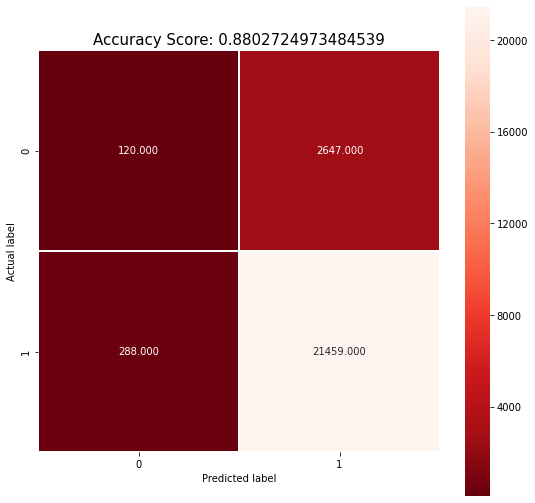

In [89]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(randomforest.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

In [111]:
from sklearn.metrics import roc_curve
YScre = randomforest.predict(x_test)

fpr, tpr,_=roc_curve(randomforest.predict(x_train),y_train,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Creating the ROC,
plt.plot(fpr, tpr, color='blue',
 lw=2, label='ROC curve')
##Finding FPR and TPR,
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
##Splecifying the label and title,
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

ValueError: Data is not binary and pos_label is not specified

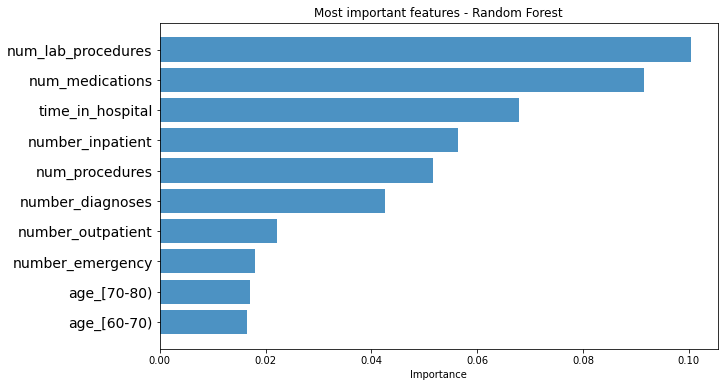

In [104]:
feature_names = x_train.columns
feature_imports = randomforest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()

In [105]:
feature_imports

array([6.79478618e-02, 1.00435264e-01, 5.16707212e-02, 9.15206118e-02,
       2.21206732e-02, 1.80810546e-02, 5.64434283e-02, 4.25973628e-02,
       1.33140805e-02, 1.22030051e-03, 1.35367015e-02, 2.75592765e-03,
       2.36182619e-03, 1.61147922e-02, 1.57843866e-02, 0.00000000e+00,
       9.01466494e-05, 9.00399247e-04, 2.39840553e-03, 4.50907733e-03,
       9.02872716e-03, 1.23022934e-02, 1.64951849e-02, 1.71542676e-02,
       1.32899886e-02, 4.78634094e-03, 1.39417220e-02, 1.26891153e-02,
       9.82994790e-03, 3.49687061e-05, 4.25037352e-03, 5.24917992e-03,
       1.67401172e-05, 7.60597194e-04, 1.24658988e-02, 3.57261439e-03,
       7.18234910e-03, 1.38796999e-03, 2.10197285e-03, 7.97390871e-03,
       1.30153842e-03, 2.55955150e-04, 9.30169875e-05, 4.05357482e-06,
       8.29288339e-03, 1.05391208e-04, 1.10765649e-03, 9.70073735e-04,
       5.57364089e-04, 2.35241456e-06, 0.00000000e+00, 3.55004237e-03,
       6.79531049e-06, 2.73642637e-06, 7.23753107e-03, 8.17580094e-04,
      